# Behavioral Analysis and Data Science
## Erasmus Training Workshop - Day 4

**Strongway, 2024**

This workshop focuses on data analysis and visualization using Python and Jupyter Notebook. We will emphasize applying data science principles to analyze behavioral data, rather than approaching it from a computer science programming perspective.


## Key principles in Data Science and Behavioral Analysis

The data science approach to programming, particularly when dealing with data manipulation and analysis, often differs from traditional computer science programming in philosophy, methodology, and tools. The emphasis in data science is on efficiently processing large datasets and achieving clear, concise, and reproducible code, often using **vectorized operations, chaining, and declarative programming paradigms**.

### Key principles in data science programming:
1. Declarative programming

In data science, operations often emphasize "what" needs to be done rather than "how" to do it. This contrasts with the imperative style in computer science programming, where step-by-step instructions are explicit.

For example, using pandas-like syntax (`df.groupby('group').mean()`) is declarative, the focus is on describing  transformations instead of writing low-level itetrative code.

2. Vectorized operations

Data Science libraries like `pandas`, `numpy`, and R's `dplyr` emphasize vectorized operations. This means that operations are applied to entire arrays or columns of data at once, rather than iterating over each element.

3. Chaining in python and piping in R

Chaining or piping operations is a concise and expressive way to apply multiple operations sequentially, without creating intermediate variables or repeatedly referencing the same object.

For example, in pandas, you can chain operations like this:

```python
 result = (df
          .groupby('category')
          .agg({'value': 'mean'})
          .reset_index()
          .sort_values(by='value', ascending=False))
```

and in R, you can use the `tyidyverse` package to pipe operations like this:

```R
result = (df
          .groupby('category')
          .agg({'value': 'mean'})
          .reset_index()
          .sort_values(by='value', ascending=False))
```
This is in contrast to using multiple intermediate variables, which can clutter code and increase the likelihood of errors. Additionally, you don't need to worry about the numbers of groups or the size of the data, as the operations are applied to the entire dataset at once.

4. Data Frames as First-Class Citizens

In data science, the `data.frame` (or equivalent) is often treated as the fundamental data structure, rather than primitive data types like lists or arrays. Operations are expressed in terms of transformations applied to the entire frame or its subsets, enabling parallelization and abstraction.


### Why Chaining and Vectorized Operations Matter

1. Efficiency:

- Chaining avoids intermediate variables, reducing memory overhead and clutter.
- Vectorized operations are often implemented in compiled languages, ensuring faster execution.

2. Readability:

- Chained operations resemble natural workflows (e.g., filtering, transforming, summarizing), making the code intuitive and easier to review.

3. Scalability:

- Explicit loops may struggle with very large datasets, as they are often not optimized for parallel computation. Vectorized operations or chaining mechanisms leverage built-in optimizations for scalability.


## Implementing Data Science Principles in Behavioral Analysis

Let's consider a real example of how these principles can be applied to behavioral data analysis. 
We will use a recent study on 'distractor volatility and distractor suppression' by Qiu et al. (2024). 

__Background of this study:__
Statistical learning to suppress the location(s) of where a salient distractor is likely (vs. unlikely) to occur can enhance visual search efficiency, an effect termed distractor-location probability cueing. However, whether this effect is influenced by the volatility of distractor occurrence (i.e., of the sequence of distractor-present and -absent events) remains poorly understood. Here, we investigated this question by contrasting two volatility regimens in a distractor-location probability-cueing paradigm: a low-volatility environment ( distractor-present and -absent trials likely streaked) and a high-volatility environment (two trial types changing frequently).

The raw data and analysis code are hosted in a [github repository](https://github.com/msenselab/statistical_learning_with_volatility). 

Here we use the data from this study to demonstrate how to apply data science principles to analyze behavioral data, while ignoring the actual scientific questions and interpretations.

In [2]:
# Some prep work to get the data from R and into pandas
%matplotlib inline

# pandas for data process, seaborn for plotting, in addition, matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

pd.set_option("display.max_rows", 5)

### 1. Data importing

The first step in any data analysis is loading the data. Pandas supports reading from various file formats like CSV, Excel, SQL, JSON, etc.

In [10]:
url = 'https://raw.githubusercontent.com/msenselab/statistical_learning_with_volatility/refs/heads/main/csv/raw_data_all2.csv'
dat = pd.read_csv(url)
# show dat dimension
print(dat.shape)
dat.head()

(69120, 14)


,Unnamed: 0,tar_pos,dist_pos,block,correct,rt,sub,volatility,dist_repe,dist_repe_absent,dist_attendance,dist_switch,coincident,Abe_Pre
0,0,2.0,0.0,1.0,1.0,1.501370,s1,high,0,1,NaN,NaN,none,absent
1,1,2.0,1.0,1.0,1.0,1.000736,s1,high,1,0,AP,switch,none,present
2,2,2.0,1.0,1.0,1.0,1.368081,s1,high,2,0,PP,non_switch,none,present
3,3,2.0,0.0,1.0,1.0,0.684040,s1,high,0,1,PA,switch,non-coincident,absent
4,4,2.0,0.0,1.0,1.0,0.565839,s1,high,0,2,AA,non_switch,none,absent


### 2. Basic Exploration

Understanding your data is essential before diving into analysis. This includes checking the data types, missing values, and basic summary statistics.

```python
# Check data structure
print(df.info())

# Summary statistics
print(df.describe())

# View column names
print(df.columns)

# Check for missing values
print(df.isnull().sum())
```


In [ ]:
# with the loaded data `datz, please summarize the dataset
print(dat.____())  # Hint: Which method provides data type and null values?

# Your Turn:
# - Summarize numerical columns. What method would you use for this?
# - Check for missing values in the dataset and think about how to handle them.


       Unnamed: 0   tar_pos      dist_pos    block       correct  \
count    69120.00  69120.00  69120.000000  69120.0  69120.000000   
mean     34559.50      4.50      2.260156      5.0      0.983883   
...           ...       ...           ...      ...           ...   
75%      51839.25      6.25      5.000000      7.0      1.000000   
max      69119.00      8.00      8.000000      9.0      1.000000   

                 rt    dist_repe  dist_repe_absent  
count  69120.000000  69120.00000      69120.000000  
mean       1.075487      1.14987          1.176317  
...             ...          ...               ...  
75%        1.251761      1.00000          1.000000  
max        4.004260     17.00000         27.000000  

[8 rows x 8 columns]


### 3. Selecting Data

**Selecting Columns**: You can select columns by name or index. For example, to select columns 'subject', 'condition', and 'RT':

```python
df[['subject', 'condition', 'RT']]
```
Selecting Rows: You can select rows based on conditions. For example, to select rows where 'RT' is greater than 3:

```python
df[df['RT'] > 3]
```

Or even better using query for better readability:

```python
df.query('RT > 3 and correct < 1')
```


In [ ]:
# Your Turn:
# select correct trials and columns of interest: sub, correct, rt, and volatility
vdat = dat.query(___)[[___]]
vdat.head()

,sub,correct,rt,volatility
0,s1,1.0,1.501370,high
1,s1,1.0,1.000736,high
2,s1,1.0,1.368081,high
3,s1,1.0,0.684040,high
4,s1,1.0,0.565839,high


If you are using R, ``dplyr`` has a small set of nicely defined verbs as well. I've listed their closest pandas verbs.


<table>
  <tr>
    <td><b>dplyr</b></td>
    <td><b>pandas</b></td>
  </tr>
  <tr>
    <td><code>filter()</code> (and <code>slice()</code>)</td>
    <td><code>query()</code> (and <code>loc[]</code>, <code>iloc[]</code>)</td>
  </tr>
  <tr>
    <td><code>arrange()</code></td>
    <td><code>sort_values</code> and <code>sort_index()</code></td>
  </tr>
  <tr>
  <td><code>select() </code>(and <code>rename()</code>)</td>
    <td><code>__getitem__ </code> (and <code>rename()</code>)</td>
  </tr>
  <tr>
  <td><code>distinct()</code></td>
    <td><code>drop_duplicates()</code></td>
  </tr>
  <tr>
    <td><code>mutate()</code> (and <code>transmute()</code>)</td>
    <td>assign</td>
  </tr>
  <tr>
    <td>summarise()</td>
    <td>None</td>
  </tr>
  <tr>
    <td>sample_n() and sample_frac()</td>
    <td><code>sample</code></td>
  </tr>
  <tr>
    <td><code>%>%</code></td>
    <td><code>pipe</code></td>
  </tr>

</table>


Some of the "missing" verbs in pandas are because there are other, different ways of achieving the same goal. For example `summarise` is spread across `mean`, `std`, etc. It's closest analog is actually the `.agg` method on a `GroupBy` object, as it reduces a DataFrame to a single row (per group). This isn't quite what `.describe` does.

I've also included the `pipe` operator from R (`%>%`), the `pipe` method from pandas, even though it isn't quite a verb.

It's worth mentioning the other common sorting method for pandas DataFrames, `sort_index`. Pandas puts much more emphasis on indicies, (or row labels) than R.
This is a design decision that has positives and negatives, which we won't go into here. Suffice to say that when you need to sort a `DataFrame` by the index, use `DataFrame.sort_index`.

__Rename__

Similar to `.replace()`, `.rename()` function also copies the data and return a new object. So you need to store it in a new object. 

```python
ndata = dat.rename(columns={'dyn': 'Display'})
ndata.head()
```


Pandas is more verbose, but the the argument to `columns` can be any mapping. So it's often used with a function to perform a common task, say `df.rename(columns=lambda x: x.replace('-', '_'))` to replace any dashes with underscores. Also, ``rename`` (the pandas version) can be applied to the Index.

One more note on the differences here.
Pandas could easily include a `.select` method.
[`xray`](http://xray.readthedocs.org/en/stable/), a library that builds on top of NumPy and pandas to offer labeled N-dimensional arrays (along with many other things) does [just that](http://xray.readthedocs.org/en/stable/indexing.html#indexing-with-labeled-dimensions).
Pandas chooses the `.loc` and `.iloc` accessors because *any valid selection is also a valid assignment*. This makes it easier to modify the data.

```python
flights.loc[:, 'year':'day'] = data
```

where `data` is an object that is, or can be broadcast to, the correct shape.

__Extracting unique values__

```python
df['condition'].unique()
```

FYI this returns a numpy array instead of a Series.

__Add new columns__

In Pandas, you need explicitly express column from which dataframe. 

```python
df.assign(new_column = df['column1'] + df['column2'])

ndata.assign(rtms=ndata.rt*1000).assign(inv_rt = lambda df: 1/df.rtms)
```



In Python, you can have arbitrary keyword arguments to functions (which we needed for `.assign`), but the order of the argumnets is arbitrary since `dict`s are unsorted and `**kwargs*` is a `dict`. So you can't have something like `df.assign(x=df.a / df.b, y=x **2)`, because you don't know whether `x` or `y` will come first (you'd also get an error saying `x` is undefined.

To work around that with pandas, you'll need to split up the assigns, and pass in a *callable* to the second assign. The callable looks at itself to find a column named `gain`. Since the line above returns a DataFrame with the `gain` column added, the pipeline goes through just fine.

In [ ]:
# summarise(ndata,
#   rt = mean(rt, na.rm = TRUE))
ndata.rt.mean()

0.5666471354166667

This is only roughly equivalent.
`summarise` takes a callable (e.g. `mean`, `sum`) and evaluates that on the DataFrame. In pandas these are spread across `pd.DataFrame.mean`, `pd.DataFrame.sum`. This will come up again when we look at `groupby`.

### 4. Grouping and Aggregation

Group data by categories and compute summary statistics for each group. 
Pandas uses `.groupby()` function, very much like dplyr::group_by. 

But you need to aware that pandas `.groupby()` will **<font color = 'red'>put grouped variables into multi-index</font>**, so the columns after grouping will not include those grouped variables. If you want to put them back **as columns** for later usage, you need to add **`.reset_index()`**. 

For example, to calculate the mean RT for each subject:

```python
df.groupby('subject')['RT'].mean()

# Aggregating multiple statistics
df.groupby('subject').agg({'RT': 'mean', 'correct': 'mean'})
```

The above chaining operation aligns with data science priciples: 
- chaining: `groupby('subject')` -> `agg({'RT': 'mean', 'correct': 'mean'})` are seamlessly connected in one logical flow. 
- Declartive: The focus is on what needs to be done (grouping and aggregating) rather than how to do it.

In [ ]:
# Your Turn:
# above we have obtained valide dataset `vdat`, now please group by `sub` and `volatility` and calculate the mean of `rt` for each group.
# Hint: use `groupby` method and `mean` method.
grouped = vdat.groupby([___, ___]).__.mean().reset_index()
grouped.head()

,sub,volatility,rt
0,s1,high,1.174967
1,s1,low,0.940426
2,s10,high,0.826142
3,s10,low,0.842970
4,s11,high,1.017050


### 5. Chaining operations

Now, we can chain operations from the raw data to final mean RTs for each subject, grouped by condition. 
For example,

```python
mrt = ndata.query('accuracy == 1')\
    .groupby(['subno','session','dimension'])\
    .agg({"resp":"count",
         "rt":"mean"})\
    .rename(columns={"resp":"count"})\
    .reset_index()
mrt.head()
```


In [ ]:
# Your Turn: use imported data `dat` with chaining rules to the final `grouped` dataset
# please complete your code here. 


### 6. Merging and joing data

Combine data from multiple DataFrames using SQL-like joins.

```python
# Merge two dataframes on a common column
pd.merge(df1, df2, on='common_column')
```	

### 7. Reshaping Data

Reshape data using pivot tables

```python
# Pivot table
df.pivot_table(index='subject', columns='condition', values='RT', aggfunc='mean')

# Melting (unpivoting) data
pd.melt(df, id_vars=['subject'], value_vars=['RT', 'correct'], var_name='metric', value_name='value')
```


In [ ]:
vdat.pivot_table(index='sub', columns='volatility', values='rt', aggfunc='mean')


volatility,high,low
sub,,
s1,1.174967,0.940426
s10,0.826142,0.842970
...,...,...
s8,0.995962,1.068627
s9,1.568039,1.150984


### 8. Exporting Data

Finally, you can export the processed data to a file for further analysis or sharing.

```python
df.to_csv('processed_data.csv', index=False)
```


## Visualization with Seaborn

Visualization in data science, particularly using Seaborn, aligns with the principles of declarative programming, chaining, and vectorization. Seaborn is a Python library built on Matplotlib, designed to make statistical graphics intuitive, efficient, and visually appealing by reducing boilerplate code.

Seaborn focuses on what you want to visualize, not how the visualization is constructed. This is achieved by abstracting the complexity of low-level plotting (handled by Matplotlib) and providing high-level, expressive commands.

Example: Scatter plot

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Declarative: Specify the data and mapping
sns.scatterplot(data=df, x='col1', y='col2', hue='category')
plt.show()
```

### Core Seaborn Visualization Types

Below are key types of Seaborn plots:

1. Relational Plots (Relationships between variables)
Relational plots explore how variables are related using scatter or line plots.

```python
sns.relplot(data=df, x='col1', y='col2', hue='category', style='type')
```

2. Categorical Plots (Relationships between numerical and categorical variables)
Categorical plots show relationships between numerical and categorical variables.

```python
sns.catplot(data=df, x='col1', y='col2', hue='category', kind='box')
```

3. Distribution Plots (Univariate and bivariate distributions)
Distribution plots visualize univariate and bivariate distributions.

```python
sns.displot(data=df, x='col1', kind='kde')
```


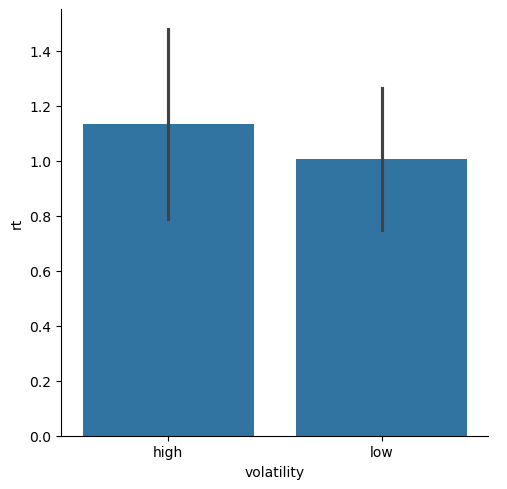

In [ ]:
# now use seaborn to plot the grouped data
sns.catplot(data=grouped, x='___', y='___', kind='___', errorbar='sd')

__Reflection Question:__ How does Seaborn's declarative syntax and chaining operations align with data science principles? 

## Visualization with Altair 

Altair is a declarative statistical visualization library for Python, based on Vega and Vega-Lite.

Altair offers a powerful and concise visualization grammar that enables you to build a wide range of statistical visualizations quickly.

### 1. Declarative Programming in Altair
Altair focuses on *what* the visualization should represent rather than *how* it should be rendered. You define mappings between data and visual properties (e.g., axes, colors, sizes), and Altair handles the rendering process.

In [31]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [33]:
import altair as alt
from sklearn import datasets
import pandas as pd


iris = datasets.load_iris()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
# rename columns
iris_df.columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'species']

alt.Chart(iris_df).mark_point().encode(
    x='SepalLength',
    y='SepalWidth',
    color='species'
).interactive()


alt.Chart(...)

#### The Chart Object

The fundamental object in Altair is the Chart, which takes a dataframe as a single argument. 
Each top-level chart object (i.e. `Chart`, `LayerChart`,
and `VConcatChart`, `HConcatChart`, `RepeatChart`,
`FacetChart`) accepts a dataset as its first argument.
The dataset can be specified in one of three ways:

- as a `Pandas DataFrame <http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html>`_
- as a `Data` or related object (i.e. `UrlData`, `InlineData`, `NamedData`)
- as a url string pointing to a ``json`` or ``csv`` formatted text file

```python
chart = alt.Chart(df)
```

#### Encodings and Marks

With this chart object in hand, we can now specify how we would like the
data to be visualized. This is done via the ``mark`` attribute of the chart
object, which is most conveniently accessed via the ``Chart.mark_*`` methods.
For example, we can show the data as a point using `Chart.mark_point`:

```python
alt.Chart(iris).mark_point()
```

Altair provides a number of mark properties:


1.   area: `mark_area()`
2.   bar: `mark_bar()`
3. line: `mark_line()`
4. point: `mark_point()`, `mark_circle()`, `mark_square()`
5. text: `mark_text()`

`mark_*()` accept a number of parameters. Please see [user guide here for details](https://altair-viz.github.io/user_guide/marks.html).

### Encodings

Above it draws only one point, because we haven't assign what for `x` and what for `y` etc. This is done by `encode()` method, which builds a key-value mapping between encoding channels (such as `x`,`y`,`color`,`shape`,`size`, etc.) to columns in the dataset, accessed by colmun name. See above example. 

Altair provides a number of encoding channels that can be useful in different circumstances:

__Position Channels__:

* x  - The x-axis value
* y - The y-axis value
* x2 - Second x value for ranges (e.g., error bars)
* y2 - second y value for ranges (e.g., error bars for y)

__Mark Property Channels__:

* color - the color of the mark
* fill - the fill color for the mark
* opacity - the opacity of the mark
* shape - the shape of the mark
* size - the size of the mark
* stroke - the stroke of the mark

__Text and other channels__

* text - text to use for the mark
* tooktip - the tooltip value
* detail - additional property to group by

__Facet Channels__

* column - The column of a faceted plot
* row - the row of a faceted plot

### Encoding data type

By default Altair will look the data type and use them correspondently. Alternative, you can specify them explicitly. There are __four__ main types:

Data Type  |    Shorthand Code | Description
--- | ---- | ----
quantitative |  ``Q``   |        a continuous real-valued quantity
ordinal      | ``O``    |       a discrete ordered quantity
nominal     |  ``N``  |         a discrete unordered category
temporal    |  ``T``  |         a time or date value

The types can either be expressed in a long-form using the channel encoding classes such as X and Y, or in short-form using the Shorthand Syntax.

THe shorthand form (e.g., `x = "name:Q"`) is useful when doing quick data explorations. The long-form, `alt.X('name', type = 'quantitative')` is useful when doing more fine-tuned adjustments to the encoding, such as binning, axis and scale properties, or more.  

```python
alt.Chart(pd.DataFrame({'a': list('CCCDDDEEE'),
                     'b': [2, 7, 4, 1, 2, 6, 8, 4, 7]})).mark_bar().encode(
    y='a:N',
    x='average(b):Q'
)
```

### 2 Method Chaining in Altair

Altair’s API encourages method chaining, allowing you to construct complex visualizations step by step, without intermediate variables.

Example: Adding Customizations

```python
chart = alt.Chart(df).mark_circle(size=60, color='blue').encode(
    x='x',
    y='y'
).properties(
    title='Simple Scatter Plot',
    width=400,
    height=300
)
chart
```
- Chaining: Each step modifies the chart object without breaking the flow.
- Properties: Easily customize chart size, title, and other parameters.



### Core Altair Visualization Types

1. Relational Plots (Relationships between variables)

Altair supports a wide range of relational plots, including scatter plots, line plots, and area plots.

```python
alt.Chart(df).mark_point().encode(
	x='x',
	y='y',
	color='category',
	size='value'
)
```

2. Distribution Plots (Univariate and bivariate distributions)
Altair provides various distribution plots, such as histograms, kernel density plots, and box plots.

```python
alt.Chart(df).mark_bar().encode(
	x='x:Q', # Quantitative variable
	y='count()', #Automatic count aggregation and binning
	color='category'
)
```

3. Categorical Plots (Relationships between numerical and categorical variables)
Altair supports categorical plots like bar charts, stacked bar charts, and grouped bar charts.

```python
alt.Chart(df).mark_bar().encode(
	x='category',
	y='average(value)',
	color='category'
)
```

4. Layering and Composition
Altair allows you to layer multiple plots and compose them into a single visualization.

```python
points = alt.Chart(df).mark_point().encode(x='x', y='y')
line = alt.Chart(df).mark_line().encode(x='x', y='y')

layered_chart = points + line
layered_chart
```

Example of Facet Chart

```python
alt.Chart(df).mark_point().encode(
	x='x',
	y='y',
	color='category'
).facet(
	column='category'
)
```

In [35]:
base = alt.Chart(iris_df).mark_point().encode(
    x = 'SepalLength:Q',
    y = 'SepalWidth:Q'
).properties(
    width = 150,
    height = 150
)

alt.hconcat(
    base.encode(color = 'species:N').properties(title = 'Ordinal'),
    base.encode(color = 'PetalWidth:Q').properties(title = 'Quantitative'),
).interactive()

alt.HConcatChart(...)

### Altair Practice Challenge

Now, let's practice creating a simple scatter plot using Altair. We still use the same dataset from the distractor suppression study.

Please create similar scatter plot as above using Altair. 

